Importing Libraries

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
# Load dataset
df = pd.read_csv(r'C:\Users\GUNDE RAJU\Downloads\cyberbullying_tweets.csv (4).zip')  # Replace with your dataset path

# Explore the first few rows
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(df.duplicated().sum())
# Fill or drop missing values
df.fillna("Unknown", inplace=True)
df.drop_duplicates(inplace=True)

# Check the label distribution (bullying vs. non-bullying)
#print(df['label'].value_counts())


                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB
None
                                               tweet_text cyberbullying_type
count                                               47692              47692
unique                                              46017          

In [46]:
import pandas as pd
import zipfile

# Open the zip file and read the CSV
with zipfile.ZipFile(r'C:\Users\GUNDE RAJU\Downloads\cyberbullying_tweets.csv (4).zip') as z:
    with z.open('cyberbullying_tweets.csv') as f:  # Replace with the actual CSV name within the zip file
        df = pd.read_csv(f)


In [47]:
import re
# Now, assuming the text column is named 'message', update accordingly
def clean_text(tweet_text):
    text = tweet_text.lower()  # Convert text to lowercase
    text = re.sub(r'http\S+|www\S+', '', tweet_text)  # Remove URLs
    text = re.sub(r'@[A-Za-z0-9]+', '', tweet_text)  # Remove user mentions
    text = re.sub(r'[^a-zA-Z\s]', '', tweet_text)  # Remove special characters and digits
    return text

# Apply the cleaning function to the correct column
df['cleaned_text'] = df['tweet_text'].apply(clean_text)

# Check the cleaned text
print(df[['tweet_text', 'cleaned_text']].head())
df.head(10)

                                          tweet_text  \
0  In other words #katandandre, your food was cra...   
1  Why is #aussietv so white? #MKR #theblock #ImA...   
2  @XochitlSuckkks a classy whore? Or more red ve...   
3  @Jason_Gio meh. :P  thanks for the heads up, b...   
4  @RudhoeEnglish This is an ISIS account pretend...   

                                        cleaned_text  
0  In other words katandandre your food was crapi...  
1  Why is aussietv so white MKR theblock ImACeleb...  
2  XochitlSuckkks a classy whore Or more red velv...  
3  JasonGio meh P  thanks for the heads up but no...  
4  RudhoeEnglish This is an ISIS account pretendi...  


,tweet_text,cyberbullying_type,cleaned_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,In other words katandandre your food was crapi...
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,Why is aussietv so white MKR theblock ImACeleb...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,XochitlSuckkks a classy whore Or more red velv...
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,JasonGio meh P thanks for the heads up but no...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,RudhoeEnglish This is an ISIS account pretendi...
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying,Rajaaab Quickieleaks Yes the test of god is th...
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying,Itu sekolah ya bukan tempat bully Ga jauh kaya...
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying,Karma I hope it bites Kat on the butt She is j...
8,@stockputout everything but mostly my priest,not_cyberbullying,stockputout everything but mostly my priest
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying,Rebecca Black Drops Out of School Due to Bullying


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Separate features (text) and target (labels)
X = df['tweet_text']
y = df['cyberbullying_type']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit the vectorizer on the training data and transform both training and test data
X_train_tfidf = tfidf.fit_transform(X_train)  # Fit and transform on training data
X_test_tfidf = tfidf.transform(X_test)        # Only transform the test data

# Check the shape of the TF-IDF matrix
print("Training data shape:", X_train_tfidf.shape)
print("Testing data shape:", X_test_tfidf.shape)

Training data shape: (38153, 5000)
Testing data shape: (9539, 5000)


Logistic Regression model

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8317433693259252
Classification Report:
                      precision    recall  f1-score   support

                age       0.96      0.98      0.97      1603
          ethnicity       0.98      0.97      0.97      1603
             gender       0.90      0.82      0.86      1531
  not_cyberbullying       0.60      0.59      0.60      1624
other_cyberbullying       0.63      0.70      0.66      1612
           religion       0.95      0.95      0.95      1566

           accuracy                           0.83      9539
          macro avg       0.84      0.83      0.83      9539
       weighted avg       0.84      0.83      0.83      9539



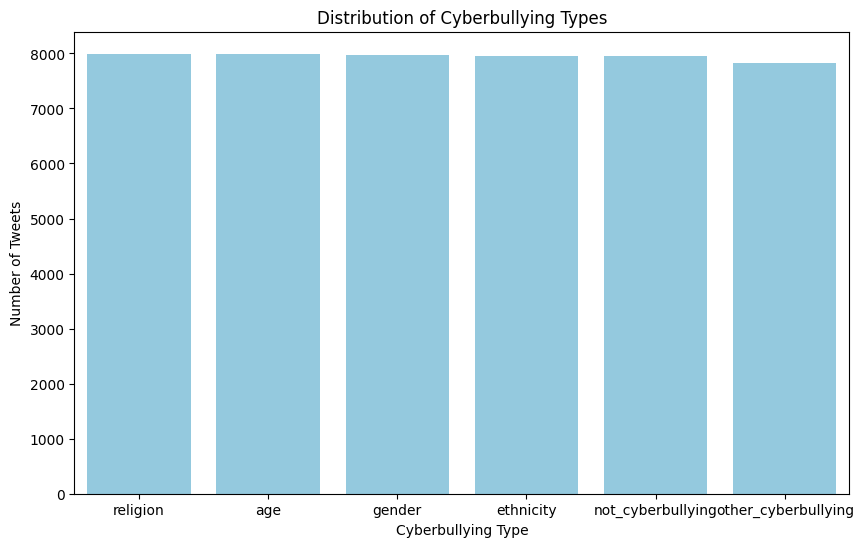

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of instances for each category
label_counts = df['cyberbullying_type'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, color="skyblue")
plt.title("Distribution of Cyberbullying Types")
plt.xlabel("Cyberbullying Type")
plt.ylabel("Number of Tweets")
plt.show()

Accuracy: 0.8317
Classification Report:
                     precision    recall  f1-score   support

                age       0.96      0.98      0.97      1603
          ethnicity       0.98      0.97      0.97      1603
             gender       0.90      0.82      0.86      1531
  not_cyberbullying       0.60      0.59      0.60      1624
other_cyberbullying       0.63      0.70      0.66      1612
           religion       0.95      0.95      0.95      1566

           accuracy                           0.83      9539
          macro avg       0.84      0.83      0.83      9539
       weighted avg       0.84      0.83      0.83      9539



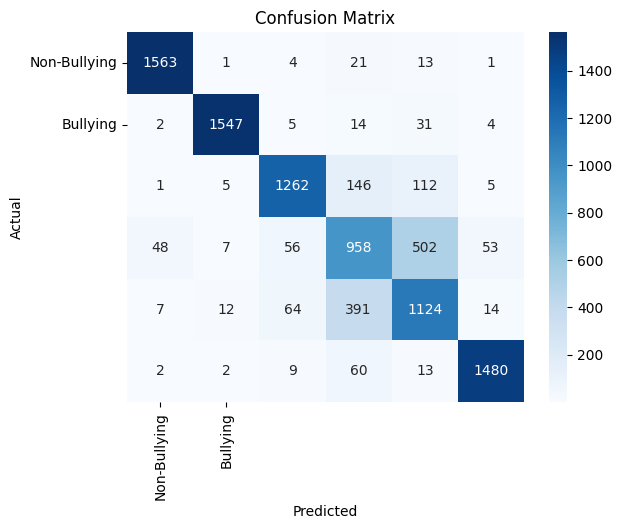

In [27]:
# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the TF-IDF features
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Bullying', 'Bullying'], yticklabels=['Non-Bullying', 'Bullying'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Unique types of cyberbullying:
['not_cyberbullying' 'gender' 'religion' 'other_cyberbullying' 'age'
 'ethnicity']


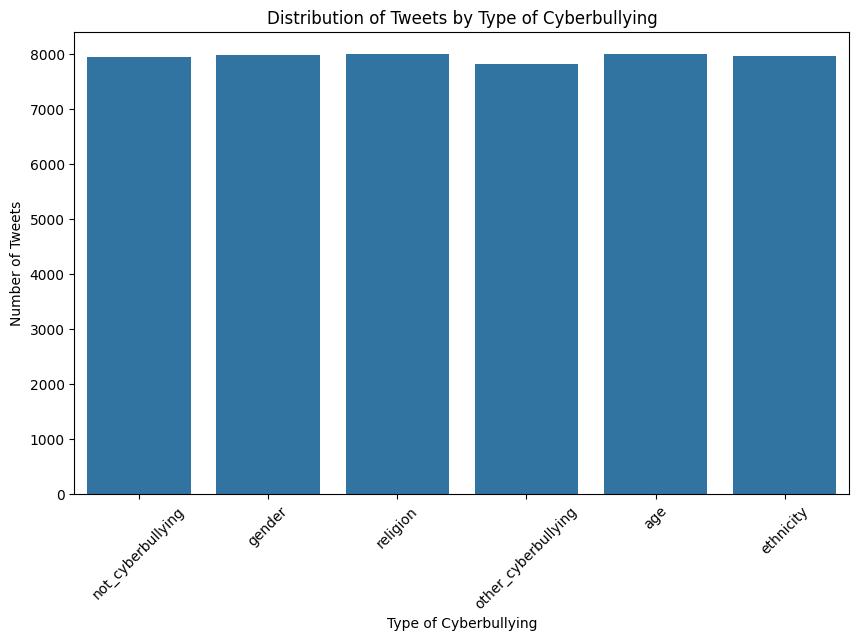

In [28]:
# Replace 'your_data.csv' with your actual data file path
data = pd.read_csv(r'C:\Users\GUNDE RAJU\Downloads\cyberbullying_tweets.csv (4).zip')

# Check the unique values in the 'cyberbullying_type' column to confirm it exists
print("Unique types of cyberbullying:")
print(data['cyberbullying_type'].unique())  # Adjust this column name as necessary

# Plot the distribution of tweets labeled by type of cyberbullying
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='cyberbullying_type')  # Change 'cyberbullying_type' to your actual column name
plt.title('Distribution of Tweets by Type of Cyberbullying')
plt.xlabel('Type of Cyberbullying')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

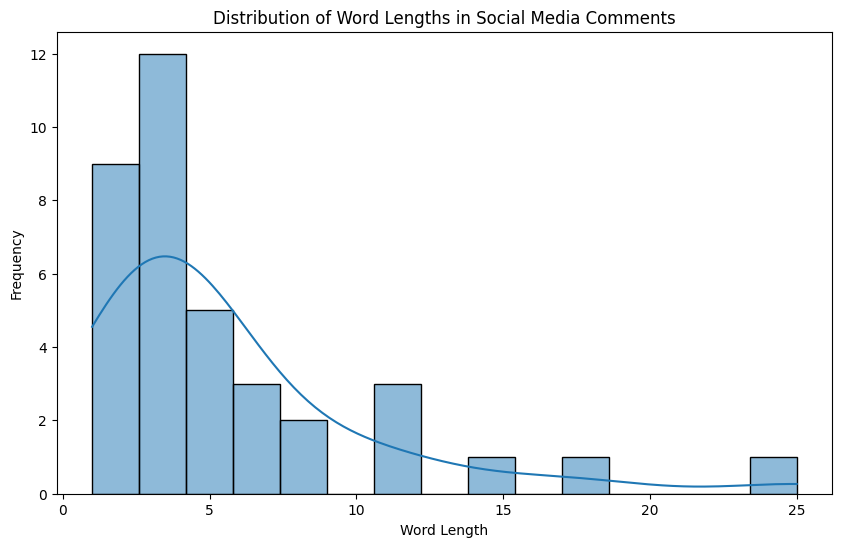

In [30]:
# Sample data: Replace this with your actual list of social media comments or posts
texts = [
   " In other words katandandre your food was crapi..."
    "Why is aussietv so white MKR theblock ImACeleb..."  
    "XochitlSuckkks a classy whore Or more red velv..."  
    "JasonGio meh P  thanks for the heads up but no..."  
    "RudhoeEnglish This is an ISIS account pretendi..."
]

# Calculate word lengths
word_lengths = [len(word) for text in texts for word in text.split()]

# Create a DataFrame for better visualization
df = pd.DataFrame(word_lengths, columns=['Word Length'])

# Plot distribution chart for word lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['Word Length'], kde=True, bins=15)
plt.title("Distribution of Word Lengths in Social Media Comments")
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.show()

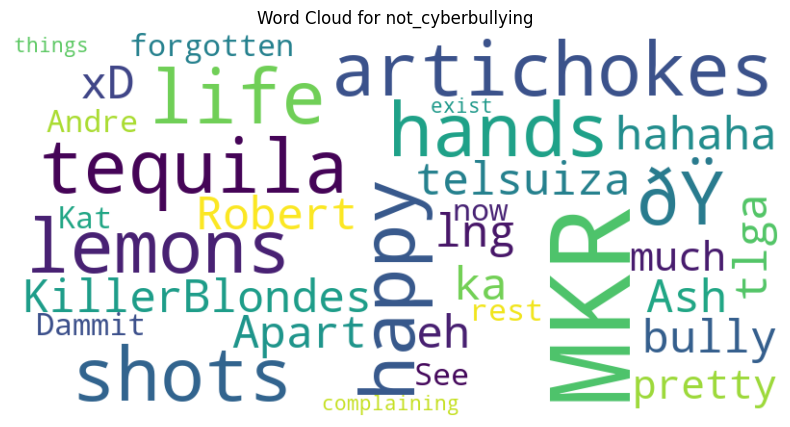

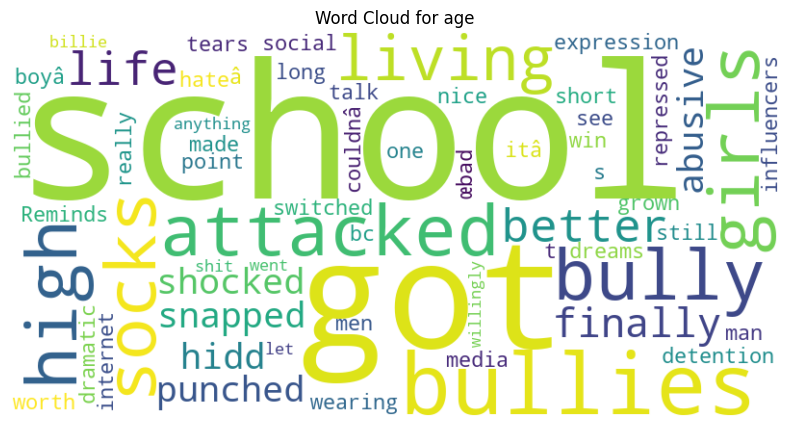

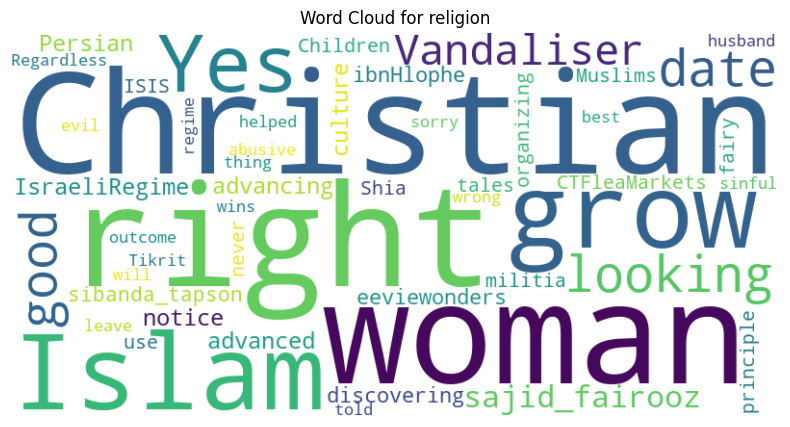

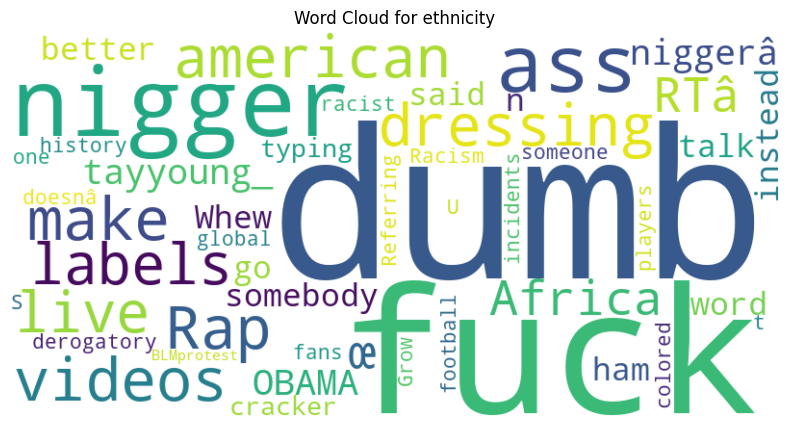

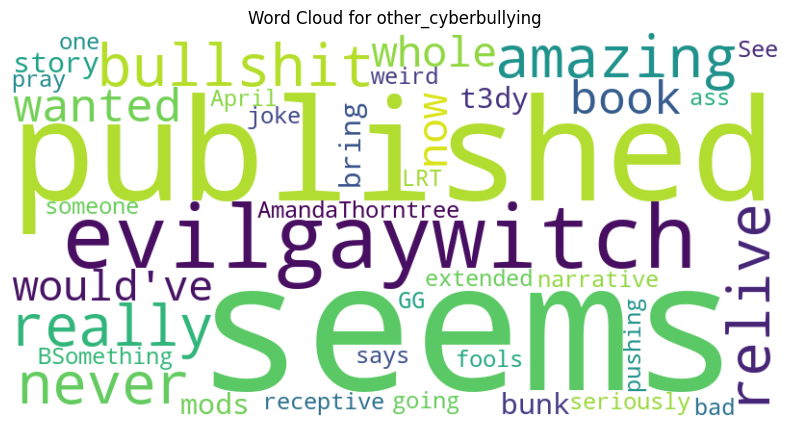

In [37]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sample dataset: Replace this with your actual dataset
data = {
    'not_cyberbullying': [
        "i'm happy when life hands me lemons. can't do shots of tequila with artichokes. #MKR ðŸ´ #KillerBlondes",
        "@telsuiza hahaha xD bully ka lng tlga eh :)) =))",
        "Apart from Ash and Robert, I'd pretty much forgotten about the rest of them. #MKR",
        "Dammit, not Kat/Andre #MKR",
        "See, now we're both complaining about things that don't exist."
    ],
    'age': [
        "My high school life got better when I finally snapped and punched my abusive bully: hidd shocked expression and tears made the detention I got more than worth it.",
        "Reminds me of the bullies at school who at one point attacked me for wearing long socks and when I switched to short socks like the other girls they attacked me for that too. I couldn't win.",
        "i hate social media influencers man... itâ€™s really grown men out here on the internet living out their repressed dreams of being a â€œbad boyâ€ bc they got bullied in high school and they couldnâ€™t talk to girls until they were 18",
        "nice to see school bullies are still.... bullies",
        "not to be dramatic or anything but if billie and i went to the same school, i'd willingly let her bully the living shit out of me"
    ],
    'religion': [
        "Yes you're right, I'm looking for a good Christian woman to date",
        "@Vandaliser @sajid_fairooz @IsraeliRegime And notice that the Persian culture was more advanced and advancing and discovering before Islam.",
        "@ibnHlophe @eeviewonders @sibanda_tapson @CTFleaMarkets Children grow out of their fairy tales.  Muslims never grow out of theirs.",
        "ISIS or Shia militia - both use Islam as their organizing principle. Regardless of who wins, the outcome will be an evil regime. #Tikrit",
        "I'm sorry you were told that. I helped a Christian woman leave her abusive husband. It's not wrong or sinful. It's the right and best thing to do."
    ],
    'ethnicity': [
        "Niggers who make Rap videos dressing american labels when they live in Africa they R dumb as fuck.",
        "RTâ€œ@tayyoung_: FUCK OBAMA, dumb ass niggerâ€ somebody better talk to her before I go ham on her ass...",
        "Whew you could have said n word instead of typing it and cracker is not derogatory it doesnâ€™t have the same history as nigger you dumb fuck",
        "Referring someone to a nigger is dumb as fuck. Grow up.",
        "Racism is global Just not in the U.S. football has one of the most racist incidents from its fans to colored players. #BLMprotest"
    ],
    'other_cyberbullying': [
        "@evilgaywitch 30 is amazing. 20's are bullshit, i would never relive my 20's.",
        "It seems to me that if she had really wanted this book published, it would've been published by now. This whole story seems so bunk.",
        "@t3dy you should bring those up with the mods. they are receptive.",
        "BSomething is seriously going down. See LRT of @AmandaThorntree. GG is pushing a weird narrative.",
        "This is one ass extended April fools I pray someone just says it's a bad joke"
    ],
}

# Function to generate and plot word cloud for each label
def plot_word_cloud(text, label):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {label}')
    plt.show()

# Generate word clouds for each label
for label, comments in data.items():
    text = ' '.join(comments)  # Combine all comments into a single string
    plot_word_cloud(text, label)
